In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, geom, probplot, stats

### FUNCION

In [2]:
def simular_lanzamientos(p, N=1000):
    """Simula una distribución geométrica contando intentos hasta el primer éxito."""
    resultados = []
    for i in range(N):
        lanzamientos = 0
        while np.random.rand() > p:
            lanzamientos += 1
        resultados.append(lanzamientos + 1)
    return resultados  

# Definir parámetros
p = 0.2  
q = 1.2 * p  
q = min(q, 0.99)  
N = 1000

# Generar las tres muestras
simulated_data = simular_lanzamientos(p, N)     
geom_p = np.random.geometric(p, N)              
geom_q = np.random.geometric(q, N)              


### FUNCION DE COMPARACION DE MUESTRAS


Comparación: Simulación vs Geom(p)


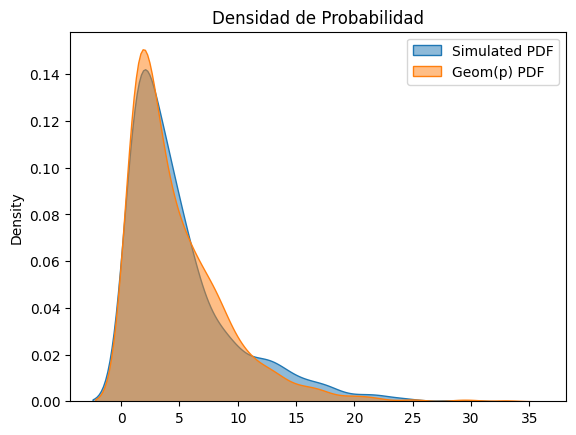

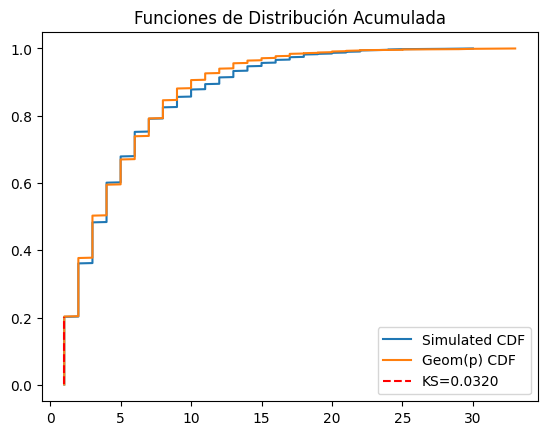

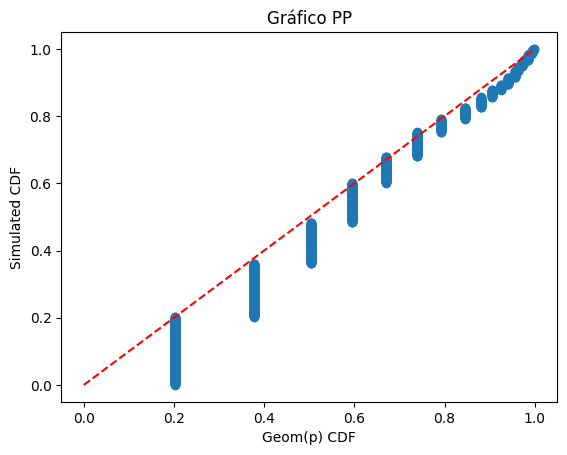

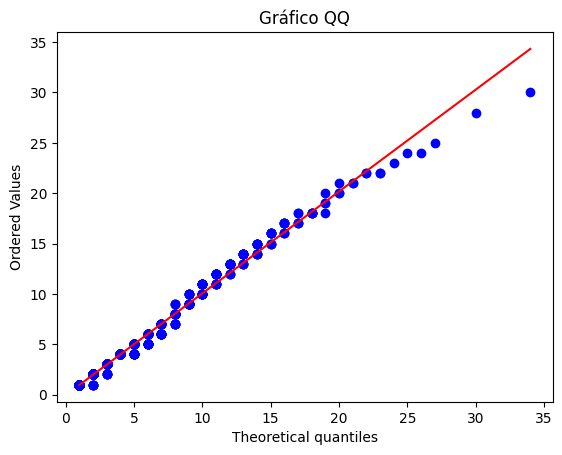

Distancia KS: 0.0320, p-valor: 0.6855
No se puede rechazar la hipótesis nula: las distribuciones pueden ser iguales.

Comparación: Simulación vs Geom(q)


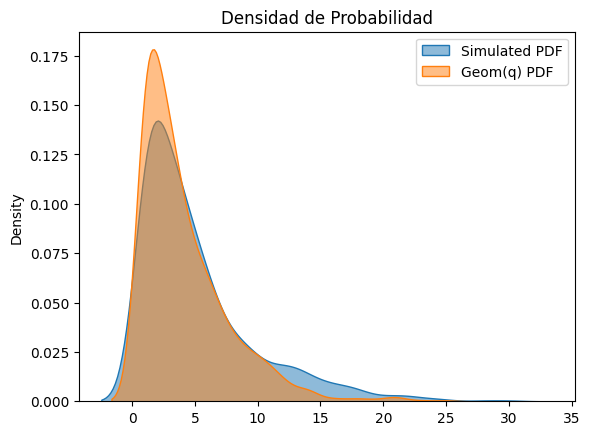

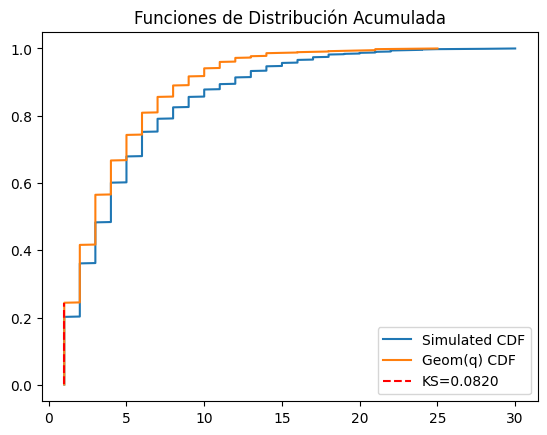

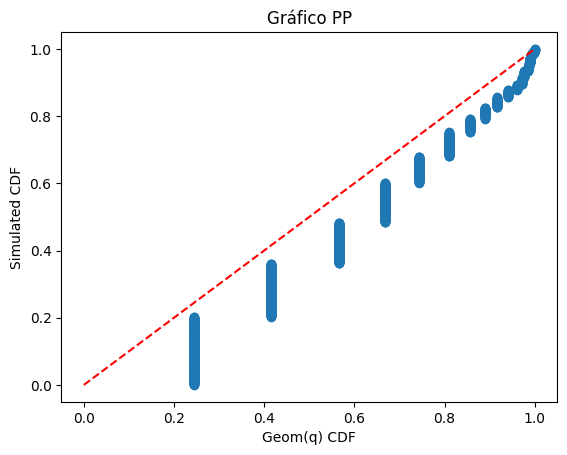

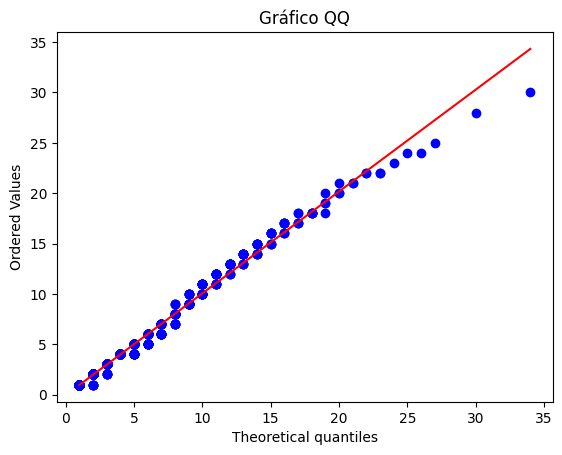

Distancia KS: 0.0820, p-valor: 0.0024
Se rechaza la hipótesis nula: las distribuciones son diferentes.


In [6]:
def compare_samples(sample1, sample2, label1="Sample 1", label2="Sample 2"):
    """Compara dos muestras con gráficos y la prueba KS."""
    
    # Calcular la prueba KS
    ks_stat, p_value = ks_2samp(sample1, sample2)
    
    # Estimaciones de densidad
    sns.kdeplot(sample1, label=f"{label1} PDF", fill=True, alpha=0.5)
    sns.kdeplot(sample2, label=f"{label2} PDF", fill=True, alpha=0.5)
    plt.title("Densidad de Probabilidad")
    plt.legend()
    plt.show()
    
    # Distribuciones acumuladas
    x1, cdf1 = np.sort(sample1), np.arange(1, len(sample1)+1) / len(sample1)
    x2, cdf2 = np.sort(sample2), np.arange(1, len(sample2)+1) / len(sample2)
    plt.plot(x1, cdf1, label=f"{label1} CDF")
    plt.plot(x2, cdf2, label=f"{label2} CDF")
    
    # Identificar el punto KS
    idx = np.argmax(np.abs(np.interp(x1, x2, cdf2) - cdf1))
    ks_x = x1[idx]
    ks_y1 = cdf1[idx]
    ks_y2 = np.interp(ks_x, x2, cdf2)
    plt.vlines(ks_x, ks_y1, ks_y2, color='red', linestyle='--', label=f'KS={ks_stat:.4f}')
    
    plt.title("Funciones de Distribución Acumulada")
    plt.legend()
    plt.show()
    
    # Gráfica PP
    plt.scatter(np.interp(x1, x2, cdf2), cdf1)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel(f"{label2} CDF")
    plt.ylabel(f"{label1} CDF")
    plt.title("Gráfico PP")
    plt.show()
    
    # Gráfica QQ
    probplot(sample1, dist="geom", sparams=(1/np.mean(sample1)), plot=plt)
    plt.title("Gráfico QQ")
    plt.show()
    
    print(f"Distancia KS: {ks_stat:.4f}, p-valor: {p_value:.4f}")
    if p_value < 0.05:
        print("Se rechaza la hipótesis nula: las distribuciones son diferentes.")
    else:
        print("No se puede rechazar la hipótesis nula: las distribuciones pueden ser iguales.")

# Comparaciones
print("\nComparación: Simulación vs Geom(p)")
compare_samples(simulated_data, geom_p, label1="Simulated", label2="Geom(p)")

print("\nComparación: Simulación vs Geom(q)")
compare_samples(simulated_data, geom_q, label1="Simulated", label2="Geom(q)")